In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [21]:
data = pd.read_csv('netflix_titles.csv')

In [5]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
print("Number of rows in the dataset ", data.shape[0])
print("Number of columns in the dataset ", data.shape[1])

Number of rows in the dataset  8807
Number of columns in the dataset  12


In [7]:
# Print info about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
# Check missing values in the dataset
print("Any missing value? ", data.isnull().values.any())

Any missing value?  True


In [9]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

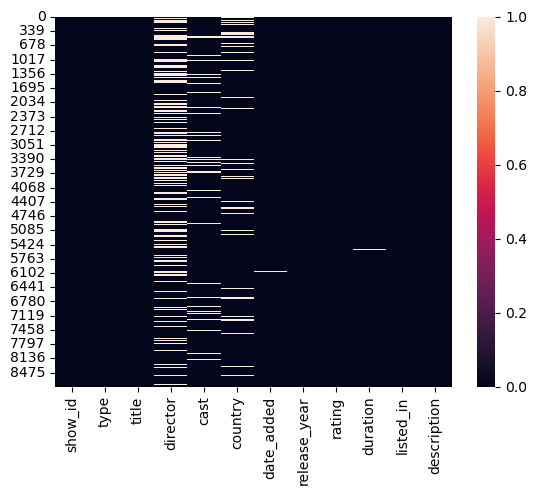

In [10]:
# Visualization of missing values
sns.heatmap(data.isnull())

In [22]:
per_missing = data.isnull().sum() * 100 / len(data)
per_missing

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [23]:
# handling missing values
data['director'].fillna('NoDataAvailable', inplace=True)
data['country'].fillna(data['country'].mode()[0], inplace=True)
data['cast'].fillna('NoDataAvailable', inplace=True)
data['date_added'].fillna(data['date_added'].mode()[0], inplace=True)
data['rating'].fillna(data['rating'].mode()[0], inplace=True)
data['duration'].fillna(data['duration'].mode()[0], inplace=True)

In [24]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [25]:
# Check for duplicate data
dup_data = data.duplicated().any()
print("Are there any duplicate values? ", dup_data)

Are there any duplicate values?  False


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

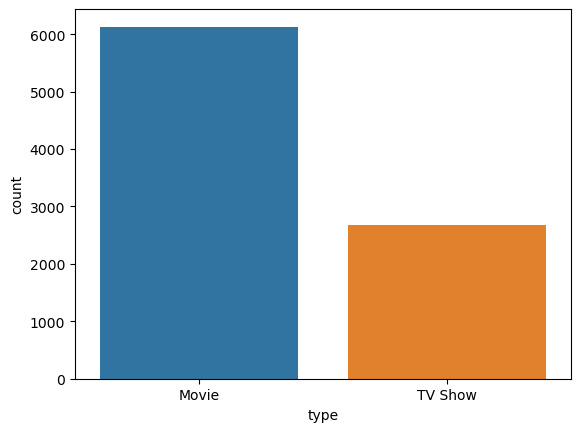

In [32]:
sns.countplot(data['type'])

In [42]:
x=data["type"].value_counts().reset_index()
px.pie(x,values="type",names="index")

In [43]:
# 69.6% are movies and 30.4 are TV shows

<AxesSubplot:xlabel='rating', ylabel='count'>

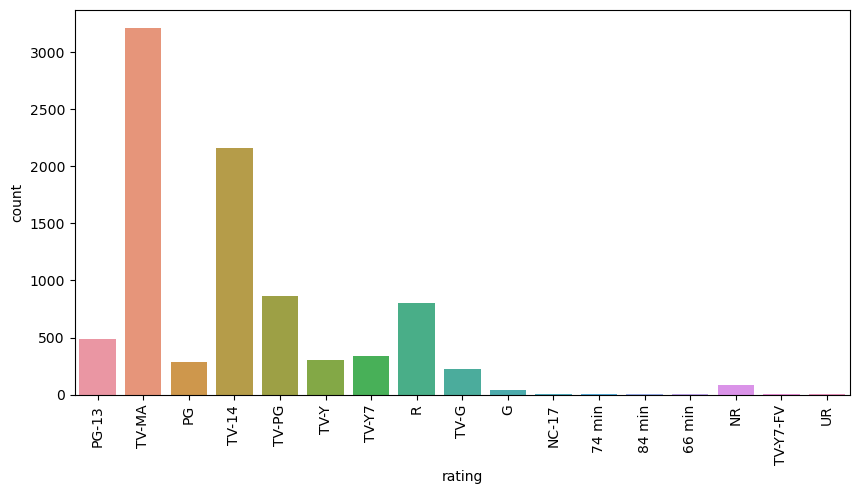

In [52]:
# Number movie and tv show of each rating

plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x='rating',data = data)


In [101]:
# COUNTRIES WITH HIGHEST NUMBER OF MOVIES & TV-SHOWS:
temp = data.groupby('country')['type'].count().sort_values(ascending=False).head(10)
temp


country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: type, dtype: int64

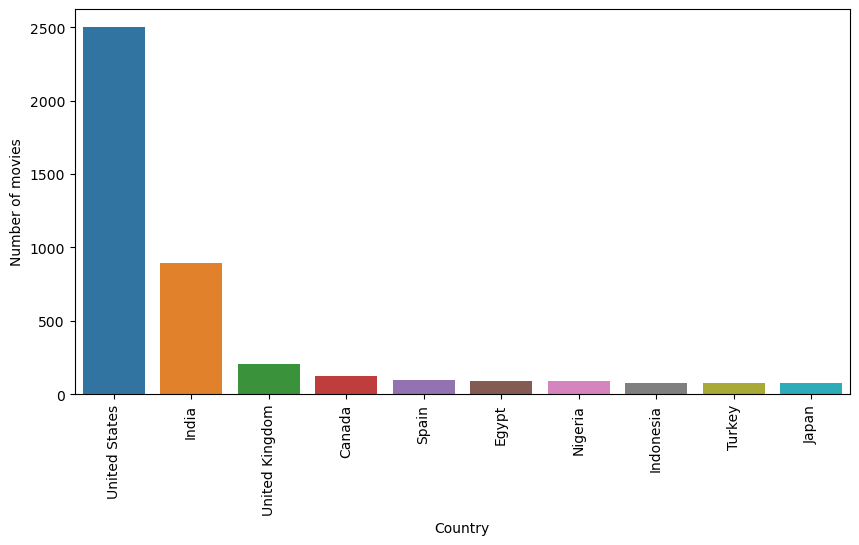

In [162]:
# Count movies per country
m=data[data["type"]=="Movie"]
movies=m["country"].value_counts().sort_values(ascending=False).reset_index()[0:10]
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)


sns.barplot(x=movies["index"],y=movies["country"])
plt.xlabel('Country')
plt.ylabel('Number of movies')
plt.show()

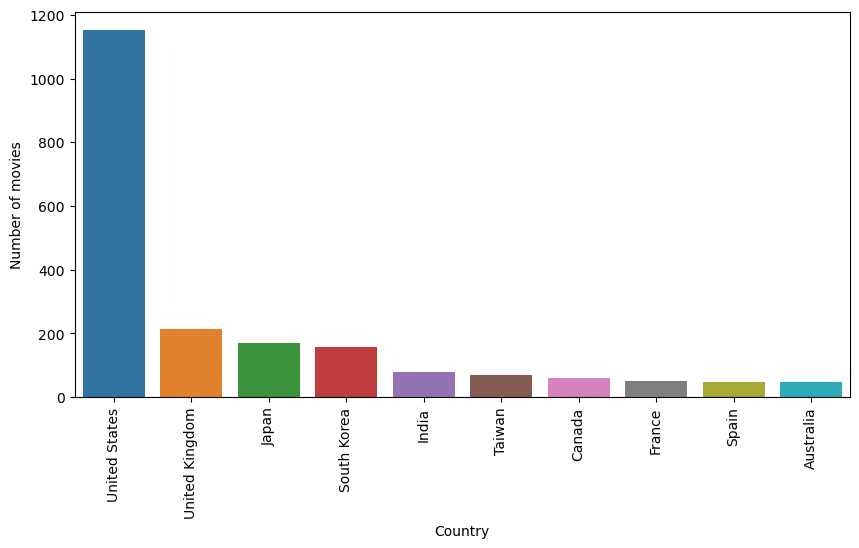

In [164]:
# Count TV Show per country
m=data[data["type"]=="TV Show"]
movies=m["country"].value_counts().sort_values(ascending=False).reset_index()[0:10]
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)


sns.barplot(x=movies["index"],y=movies["country"])
plt.xlabel('Country')
plt.ylabel('Number of movies')
plt.show()

<AxesSubplot:xlabel='rating', ylabel='count'>

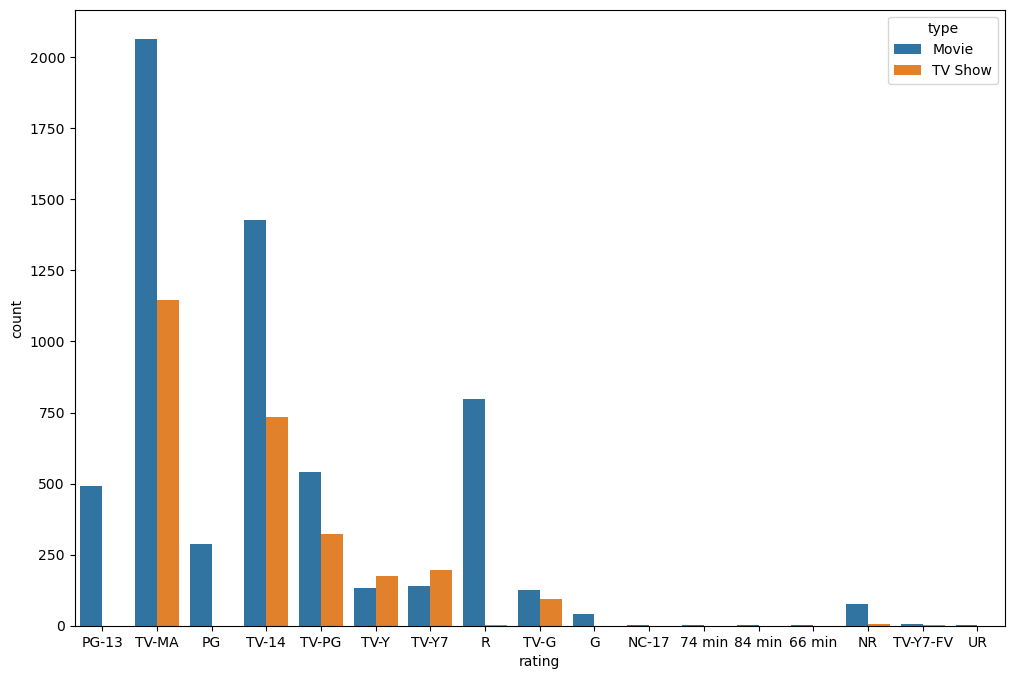

In [116]:
# Types of Tv shows and movies
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = data,hue='type')

In [125]:
# # Create year and month columns
data['date_added'] = pd.to_datetime(data['date_added'])
data["year"]=data['date_added'].dt.year
data["month"]=data['date_added'].dt.month


In [126]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NoDataAvailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,NoDataAvailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,NoDataAvailable,NoDataAvailable,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,NoDataAvailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [160]:
# Frequency of Movies which were released in different years
date = data.groupby('release_year')['type'].count().sort_values(ascending=False).reset_index().head(10)
date.head()

,release_year,type
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902


Text(0, 0.5, 'Numbers of films')

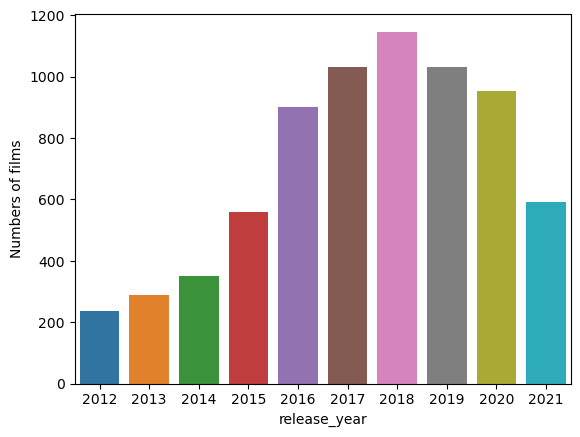

In [161]:
sns.barplot(x='release_year', y='type', data=date)
plt.ylabel("Numbers of films")

In [149]:
# In which month the most of films was added
date = data.groupby('month')['type'].count().sort_values(ascending=False).reset_index().head(12)
date

,month,type
0,7,827
1,12,813
2,9,770
3,4,764
4,10,760
5,8,755
6,1,748
7,3,742
8,6,728
9,11,705


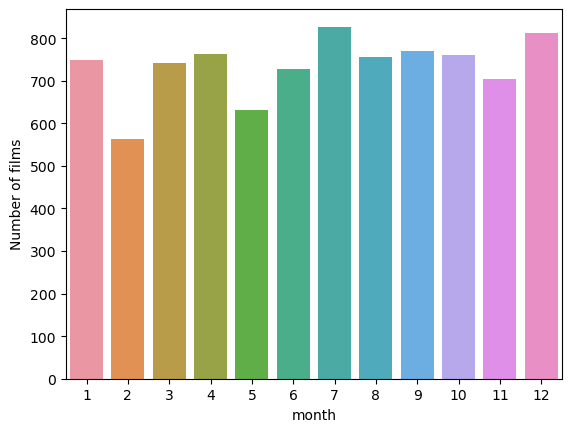

In [156]:

sns.barplot(x='month', y='type', data=date)
plt.ylabel('Number of films')
plt.show()